# LAT Mission Planning Year Calendar

### Robert Cameron, May 2017

In [1]:
# specify the year for the Calendar

year = 2017

In [2]:
offset = [0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
mlen = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
if (year % 4):
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    mlen = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [3]:
%matplotlib inline
import datetime
import calendar
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn
import numpy as np

In [4]:
plt.rc('figure', figsize = [16, 12])
#plt.rc('font', size = 18, family = 'monospace')
plt.rc('font', size = 18)
f9 = fm.FontProperties(size=9)
f10 = fm.FontProperties(size=10)
f12 = fm.FontProperties(size=13)
f14 = fm.FontProperties(size=14)
f40 = fm.FontProperties(size=40)
ralignment = {'horizontalalignment': 'right', 'verticalalignment': 'baseline'}
calignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline'}

In [5]:
month = (
    "January","February","March","April","May","June","July",
    "August","September","October","November","December"
)
wday = ("S","M","T","W","T","F","S")

In [6]:
def month_setup(month,title):
    month.axis('off')
    wday_print(month)
    month.text(0.43,1.07,title, **calignment)
#    month.set_title(title)

In [7]:
def wday_print(month):
    for d in range(0,7):
        ypos = 1.0
        xpos = d*0.15 - 0.04
        month.text(xpos,ypos,wday[d], fontproperties=f10, color='r', **calignment)

In [8]:
def month_print(month,m,days,doys):
    for w in range(len(days)):
        ypos1 = 0.9 - w*0.17
        ypos2 = ypos1 - 0.06
        for d in range(0,7):
            xpos = d*0.15
            day = days[w][d]
            doy = doys[w][d]
            if (day > 0): 
                month.text(xpos,ypos1,day, fontproperties=f14, color='g', **ralignment)
                month.text(xpos,ypos2,doy, fontproperties=f12, color='b', **ralignment)
                if (d == 4):
                    mw = int((calendar.timegm((year, m+1, day, 0, 0, 0)) - 1212019200)/(604800))
                    month.text(xpos-0.11,ypos1+0.06,mw, fontproperties=f9)

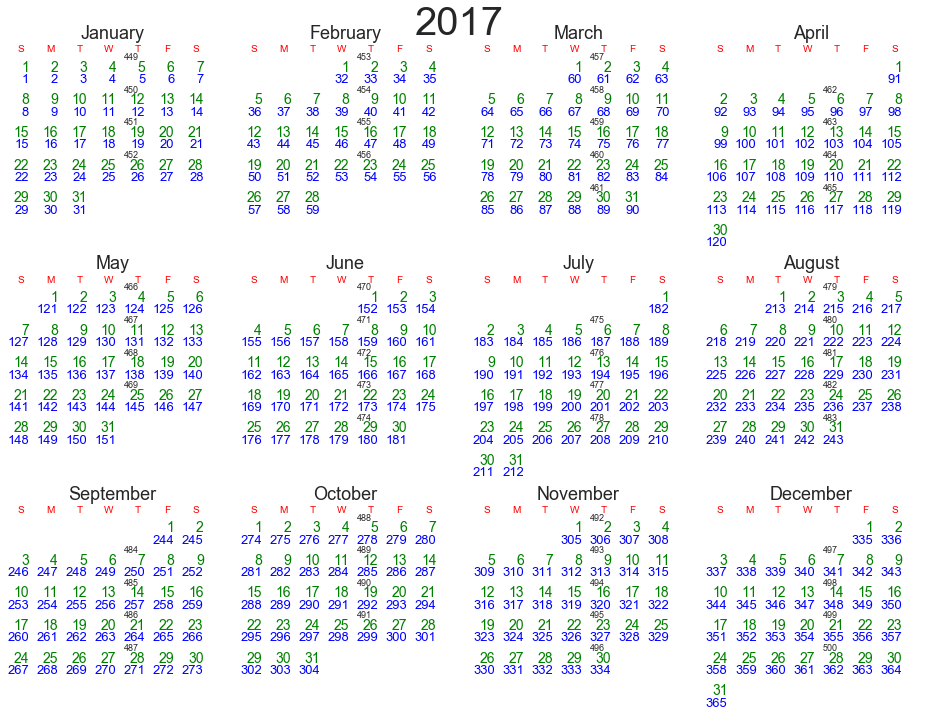

In [9]:
nrows, ncols = 3, 4

fig = plt.figure()
fig.text(0.46, 0.9, year, fontproperties=f40)

for m in range(0,12):
    mon = fig.add_subplot(nrows, ncols, m+1)
    title = month[m]
    month_setup(mon,title)
    days = calendar.monthcalendar(year+1,m+1)
    doys = np.array(days) + offset[m]
    month_print(mon,m,days,doys)


In [11]:
plt.savefig('calendar2017.pdf')

In [12]:
fig.savefig('cal2017.svg', format='svg')

In [14]:
plt.savefig('cal2017.ps', format='ps')